# Investigación de Operaciones

Proyecto Final - Otoño 2019

## Problema del agente viajero

El problema del agente viajero ( **TSP** por sus siglas en inglés) fue formulado por primera vez en 1930, es uno de los problemas de optimización combinatoria más estudiados y ha sido probado que es NP-duro. Este problema tiene numerosas aplicaciones como repartimiento de paquetes, recoger a un grupo de niños en autobús escolar, encontrar la ruta más corta en transporte público, entre otros.

## Simulated Anneling

Simulated annealing **SA** (recocido simulado, cristalización simulada, templado simulado o enfriamiento simulado) es un algoritmo de búsqueda meta-heurística para problemas de optimización global. El objetivo general de este tipo de algoritmos es encontrar una buena aproximación al valor óptimo de una función en un espacio de búsqueda grande. El método fue descrito independientemente por Scott Kirkpatrick, C. Daniel Gelatt y Mario P. Vecchi en 1983, y por Vlado Černý en 1985.

El nombre e inspiración viene del proceso de recocido del acero y cerámicas, una técnica que consiste en calentar y luego enfriar lentamente el material para variar sus propiedades físicas. El calor causa que los átomos aumenten su energía y que puedan así desplazarse de sus posiciones iniciales (un mínimo local de energía); el enfriamiento lento les da mayores probabilidades de recristalizar en configuraciones con menor energía que la inicial (mínimo global).

# Implementaciones

Se presentan 2 implementaciones:

1. La primera implementación tarda aproximadamente 7 minutos y da como resultado una ruta de aproximadamente 36000.
2. La segunda implementación tarda menos de un minuto y da como resultado una ruta de aproximadamente 21000.

## Implementacion 1

A continuación resolveremos el problema del agente viajero usando Simulated Anneling, usando datos de la localización de 634 ciudades de Luxemburgo con el objetivo de encontrar la forma más barata de visitar todas las ciudades y regresar a su punto de partida. 

Consideraciones:
1. Los costos de viaje son simétricos, es decir, viajar de la ciudad X a la ciudad Y cuesta lo mismo que viajar de Y a X.
2. En el archivo venían 980 ciudades pero quitamos las repetidas dando un total de 634.
3. El punto inicial es la ciudad 1.
3. La implementación se basa en: https://github.com/perrygeo/simanneal

In [1]:
from __future__ import print_function
import math
import random
from simanneal import Annealer

In [2]:
def distance(a, b):
    """Calculamos la distancia Euclideana entre dos puntos redondeada al entero más cercano"""
    x2 = math.pow((b[0] - a[0]),2)
    y2 = math.pow((b[1] - a[1]),2)
    return round(math.sqrt((x2 + y2)))

In [3]:
class TravellingSalesmanProblem(Annealer):

    """Aplicamos Simulated Anneling al problema del agente viajero
    """
    def __init__(self, state, distance_matrix):
        self.distance_matrix = distance_matrix
        super(TravellingSalesmanProblem, self).__init__(state)  

    def move(self):
        """Intercambiamos dos ciudades en la ruta"""
        
        initial_energy = self.energy()
        a = random.randint(0, len(self.state) - 1)
        b = random.randint(0, len(self.state) - 1)
        self.state[a], self.state[b] = self.state[b], self.state[a]

        return self.energy() - initial_energy

    def energy(self):
        """Calculamos el costo total (longuitud) de la ruta"""
        e = 0
        for i in range(len(self.state)):
            e += self.distance_matrix[self.state[i-1]][self.state[i]]
        return e

In [4]:
if __name__ == '__main__':
    cities = {
     ' 1 ' : (49525.5556 ,5940.5556),
     ' 2 ' : (49738.8889 ,6345.0000),
     ' 3 ' : (49608.3333 ,6405.8333),
     ' 4 ' : (49796.6667 ,6155.5556),
     ' 5 ' : (49828.6111 ,5764.7222),
     ' 6 ' : (49757.7778 ,6353.3333),
     ' 7 ' : (49716.3889 ,6490.0000),
     ' 8 ' : (49533.3333 ,6316.6667),
     ' 9 ' : (49616.6667 ,6233.3333),
     ' 10 ' : (49501.3889 ,6352.7778),
     ' 11 ' : (50053.3333 ,5919.1667),
     ' 12 ' : (49967.7778 ,5890.2778),
     ' 13 ' : (49623.6111 ,6136.3889),
     ' 14 ' : (49650.0000 ,6050.0000),
     ' 15 ' : (49968.8889 ,5931.9444),
     ' 16 ' : (49988.8889 ,5999.1667),
     ' 17 ' : (50140.5556 ,6023.8889),
     ' 18 ' : (49938.6111 ,6156.1111),
     ' 19 ' : (49850.0000 ,6116.6667),
     ' 20 ' : (49541.3889 ,6021.6667),
     ' 21 ' : (49750.0000 ,6200.0000),
     ' 22 ' : (49719.7222 ,6200.0000),
     ' 23 ' : (49511.1111 ,5873.8889),
     ' 24 ' : (50155.5556 ,6053.3333),
     ' 25 ' : (49816.9444 ,6088.0556),
     ' 26 ' : (49888.0556 ,6067.7778),
     ' 27 ' : (49523.8889 ,6342.2222),
     ' 28 ' : (49538.0556 ,6284.1667),
     ' 29 ' : (50137.2222 ,6075.0000),
     ' 30 ' : (49566.6667 ,6116.6667),
     ' 31 ' : (49600.0000 ,6150.0000),
     ' 32 ' : (49866.6667 ,6216.6667),
     ' 33 ' : (49963.6111 ,6124.1667),
     ' 34 ' : (49540.8333 ,6200.8333),
     ' 35 ' : (49833.3333 ,6382.7778),
     ' 36 ' : (50104.4444 ,5946.1111),
     ' 37 ' : (49972.7778 ,5941.9444),
     ' 38 ' : (50038.3333 ,5989.4444),
     ' 39 ' : (49691.3889 ,6388.3333),
     ' 40 ' : (49816.6667 ,6250.0000),
     ' 41 ' : (49944.1667 ,5785.8333),
     ' 42 ' : (49710.0000 ,6500.2778),
     ' 43 ' : (49854.4444 ,6095.0000),
     ' 44 ' : (49800.0000 ,5866.6667),
     ' 45 ' : (49658.3333 ,6137.2222),
     ' 46 ' : (49926.6667 ,6173.6111),
     ' 47 ' : (49555.0000 ,6287.5000),
     ' 48 ' : (49788.8889 ,6286.6667),
     ' 49 ' : (49816.6667 ,6300.0000),
     ' 50 ' : (49985.2778 ,6126.6667),
     ' 51 ' : (49836.6667 ,5906.3889),
     ' 52 ' : (49803.0556 ,6000.0000),
     ' 53 ' : (49935.0000 ,6208.8889),
     ' 54 ' : (49769.7222 ,5982.2222),
     ' 55 ' : (50075.5556 ,6046.6667),
     ' 56 ' : (50001.6667 ,6145.5556),
     ' 57 ' : (50121.1111 ,6000.2778),
     ' 58 ' : (49628.6111 ,6278.0556),
     ' 59 ' : (49717.7778 ,6010.2778),
     ' 60 ' : (50064.4444 ,5883.0556),
     ' 61 ' : (50046.1111 ,5878.0556),
     ' 62 ' : (49570.8333 ,6280.5556),
     ' 63 ' : (49960.2778 ,5860.8333),
     ' 64 ' : (49916.6667 ,5783.3333),
     ' 65 ' : (49894.4444 ,6163.6111),
     ' 66 ' : (49700.0000 ,6433.3333),
     ' 67 ' : (49475.8333 ,6042.2222),
     ' 68 ' : (49950.5556 ,5796.1111),
     ' 69 ' : (49897.5000 ,6183.3333),
     ' 70 ' : (49911.3889 ,5995.5556),
     ' 71 ' : (49561.9444 ,6221.6667),
     ' 72 ' : (49903.0556 ,5780.0000),
     ' 73 ' : (49620.5556 ,6073.3333),
     ' 74 ' : (49967.2222 ,6167.7778),
     ' 75 ' : (50078.8889 ,5958.0556),
     ' 76 ' : (49676.9444 ,6123.8889),
     ' 77 ' : (49696.1111 ,5920.2778),
     ' 78 ' : (49811.3889 ,6478.3333),
     ' 79 ' : (49661.3889 ,5919.1667),
     ' 80 ' : (49536.3889 ,6029.4444),
     ' 81 ' : (49830.0000 ,6171.9444),
     ' 82 ' : (49816.6667 ,5866.6667),
     ' 83 ' : (49562.7778 ,6364.4444),
     ' 84 ' : (49581.3889 ,5966.9444),
     ' 85 ' : (49965.0000 ,5826.6667),
     ' 86 ' : (49701.1111 ,5967.2222),
     ' 87 ' : (49628.0556 ,6104.4444),
     ' 88 ' : (50010.5556 ,6026.6667),
     ' 89 ' : (49641.9444 ,6239.4444),
     ' 90 ' : (50018.0556 ,5948.8889),
     ' 91 ' : (49853.0556 ,6187.2222),
     ' 92 ' : (49716.6667 ,6133.3333),
     ' 93 ' : (49830.5556 ,5854.4444),
     ' 94 ' : (49722.7778 ,5927.5000),
     ' 95 ' : (49511.6667 ,6356.9444),
     ' 96 ' : (49746.1111 ,5971.9444),
     ' 97 ' : (49716.6667 ,6216.6667),
     ' 98 ' : (49620.5556 ,6268.6111),
     ' 99 ' : (49797.7778 ,6159.1667),
     ' 100 ' : (49605.8333 ,6258.8889),
     ' 101 ' : (49582.5000 ,5956.3889),
     ' 102 ' : (49744.1667 ,6170.8333),
     ' 103 ' : (49718.8889 ,6092.2222),
     ' 104 ' : (49683.3333 ,5950.0000),
     ' 105 ' : (50181.6667 ,6025.2778),
     ' 106 ' : (49933.0556 ,6063.6111),
     ' 107 ' : (49990.5556 ,5857.5000),
     ' 108 ' : (49578.3333 ,6058.8889),
     ' 109 ' : (50010.2778 ,5852.2222),
     ' 110 ' : (49506.3889 ,6012.7778),
     ' 111 ' : (49830.5556 ,6098.6111),
     ' 112 ' : (49590.0000 ,6316.1111),
     ' 113 ' : (49471.6667 ,6365.8333),
     ' 114 ' : (49775.0000 ,6360.5556),
     ' 115 ' : (49893.6111 ,6044.7222),
     ' 116 ' : (49792.2222 ,5975.8333),
     ' 117 ' : (49804.1667 ,6253.8889),
     ' 118 ' : (49548.0556 ,5928.8889),
     ' 119 ' : (50099.4444 ,5997.5000),
     ' 120 ' : (49613.3333 ,6218.8889),
     ' 121 ' : (49695.2778 ,5870.5556),
     ' 122 ' : (49727.2222 ,5986.3889),
     ' 123 ' : (50080.0000 ,5975.5556),
     ' 124 ' : (49460.8333 ,6033.0556),
     ' 125 ' : (49955.8333 ,5924.7222),
     ' 126 ' : (49786.6667 ,6096.1111),
     ' 127 ' : (49797.7778 ,6504.1667),
     ' 128 ' : (49662.5000 ,6302.7778),
     ' 129 ' : (49691.9444 ,6002.2222),
     ' 130 ' : (49794.4444 ,5821.6667),
     ' 131 ' : (49866.9444 ,5773.3333),
     ' 132 ' : (49834.7222 ,5742.7778),
     ' 133 ' : (49622.7778 ,6107.7778),
     ' 134 ' : (49741.6667 ,6114.4444),
     ' 135 ' : (49548.8889 ,6317.2222),
     ' 136 ' : (49546.3889 ,5856.3889),
     ' 137 ' : (49542.2222 ,6150.0000),
     ' 138 ' : (49567.7778 ,6285.0000),
     ' 139 ' : (49574.7222 ,6034.7222),
     ' 140 ' : (50036.6667 ,6131.1111),
     ' 141 ' : (50055.8333 ,6083.6111),
     ' 142 ' : (49531.1111 ,5847.2222),
     ' 143 ' : (49682.5000 ,6289.1667),
     ' 144 ' : (49779.7222 ,5935.2778),
     ' 145 ' : (49546.3889 ,5840.8333),
     ' 146 ' : (49751.6667 ,5957.5000),
     ' 147 ' : (49734.1667 ,6319.4444),
     ' 148 ' : (49916.9444 ,6011.9444),
     ' 149 ' : (49850.2778 ,5901.3889),
     ' 150 ' : (50057.7778 ,6037.5000),
     ' 151 ' : (49746.6667 ,6260.2778),
     ' 152 ' : (49545.0000 ,6366.9444),
     ' 153 ' : (49488.6111 ,6351.6667),
     ' 154 ' : (49868.6111 ,6267.7778),
     ' 155 ' : (49797.2222 ,5953.8889),
     ' 156 ' : (49773.6111 ,5928.0556),
     ' 157 ' : (49765.5556 ,5890.8333),
     ' 158 ' : (49562.5000 ,6008.8889),
     ' 159 ' : (49749.7222 ,6083.0556),
     ' 160 ' : (49656.9444 ,6233.6111),
     ' 161 ' : (49830.8333 ,5845.0000),
     ' 162 ' : (49960.8333 ,6143.0556),
     ' 163 ' : (49616.6667 ,6166.6667),
     ' 164 ' : (49717.5000 ,6120.2778),
     ' 165 ' : (49801.6667 ,5939.1667),
     ' 166 ' : (49673.3333 ,6400.8333),
     ' 167 ' : (49791.1111 ,5934.7222),
     ' 168 ' : (49770.2778 ,6109.1667),
     ' 169 ' : (49549.4444 ,6000.2778),
     ' 170 ' : (49994.4444 ,6013.0556),
     ' 171 ' : (50012.7778 ,6091.3889),
     ' 172 ' : (49916.6667 ,6000.0000),
     ' 173 ' : (49616.6667 ,6133.3333),
     ' 174 ' : (49779.7222 ,5809.4444),
     ' 175 ' : (49558.3333 ,5880.5556),
     ' 176 ' : (49811.6667 ,5765.8333),
     ' 177 ' : (49524.4444 ,6129.7222),
     ' 178 ' : (50107.2222 ,6007.7778),
     ' 179 ' : (49778.8889 ,6441.3889),
     ' 180 ' : (49783.8889 ,5904.4444),
     ' 181 ' : (49657.2222 ,6000.2778),
     ' 182 ' : (49668.3333 ,6330.2778),
     ' 183 ' : (49676.1111 ,6315.5556),
     ' 184 ' : (49616.6667 ,6266.6667),
     ' 185 ' : (49596.3889 ,6260.0000),
     ' 186 ' : (50016.6667 ,5860.8333),
     ' 187 ' : (49950.0000 ,6066.6667),
     ' 188 ' : (49833.3333 ,6100.0000),
     ' 189 ' : (49730.2778 ,5843.8889),
     ' 190 ' : (49833.3333 ,6016.6667),
     ' 191 ' : (49513.6111 ,5896.1111),
     ' 192 ' : (49577.5000 ,5910.8333),
     ' 193 ' : (49777.5000 ,6150.5556),
     ' 194 ' : (49848.0556 ,6035.5556),
     ' 195 ' : (50007.2222 ,6146.6667),
     ' 196 ' : (49646.6667 ,6400.5556),
     ' 197 ' : (49768.6111 ,5820.0000),
     ' 198 ' : (50156.6667 ,5978.6111),
     ' 199 ' : (49653.6111 ,6241.1111),
     ' 200 ' : (49941.3889 ,5882.7778),
     ' 201 ' : (49675.2778 ,6008.8889),
     ' 202 ' : (49786.9444 ,6174.7222),
     ' 203 ' : (49789.1667 ,5857.7778),
     ' 204 ' : (49509.1667 ,6056.1111),
     ' 205 ' : (49979.7222 ,5910.8333),
     ' 206 ' : (49742.2222 ,5926.1111),
     ' 207 ' : (49947.5000 ,5979.1667),
     ' 208 ' : (49701.6667 ,5916.3889),
     ' 209 ' : (49969.1667 ,5923.0556),
     ' 210 ' : (50011.6667 ,5843.6111),
     ' 211 ' : (49933.3333 ,6066.6667),
     ' 212 ' : (49755.2778 ,5912.2222),
     ' 213 ' : (49536.1111 ,5893.0556),
     ' 214 ' : (49567.5000 ,5910.2778),
     ' 215 ' : (49855.5556 ,6047.2222),
     ' 216 ' : (49631.3889 ,6403.6111),
     ' 217 ' : (49758.3333 ,5826.9444),
     ' 218 ' : (50145.8333 ,5983.8889),
     ' 219 ' : (49883.3333 ,6200.0000),
     ' 220 ' : (49647.5000 ,6260.0000),
     ' 221 ' : (49877.5000 ,5887.2222),
     ' 222 ' : (50080.5556 ,5921.6667),
     ' 223 ' : (49900.0000 ,5950.0000),
     ' 224 ' : (49700.0000 ,5900.0000),
     ' 225 ' : (49566.6667 ,5933.3333),
     ' 226 ' : (49619.4444 ,6240.0000),
     ' 227 ' : (49616.3889 ,6156.6667),
     ' 228 ' : (50028.8889 ,6066.6667),
     ' 229 ' : (49948.3333 ,6129.4444),
     ' 230 ' : (49629.1667 ,6267.5000),
     ' 231 ' : (50033.6111 ,6038.6111),
     ' 232 ' : (49693.8889 ,6442.2222),
     ' 233 ' : (49784.7222 ,6310.8333),
     ' 234 ' : (49680.2778 ,6130.0000),
     ' 235 ' : (49631.6667 ,6119.1667),
     ' 236 ' : (49585.2778 ,6255.5556),
     ' 237 ' : (49733.3333 ,6216.6667),
     ' 238 ' : (49700.0000 ,6116.6667),
     ' 239 ' : (49738.3333 ,6500.0000),
     ' 240 ' : (49748.8889 ,6106.1111),
     ' 241 ' : (49533.0556 ,5988.3333),
     ' 242 ' : (49505.0000 ,6281.1111),
     ' 243 ' : (49746.1111 ,6465.0000),
     ' 244 ' : (49867.7778 ,6239.4444),
     ' 245 ' : (49768.0556 ,6116.6667),
     ' 246 ' : (49866.6667 ,5833.3333),
     ' 247 ' : (49818.6111 ,6020.2778),
     ' 248 ' : (49900.0000 ,6091.9444),
     ' 249 ' : (49761.6667 ,6188.8889),
     ' 250 ' : (49833.8889 ,6007.5000),
     ' 251 ' : (49696.1111 ,6481.3889),
     ' 252 ' : (49954.7222 ,6106.9444),
     ' 253 ' : (49871.9444 ,5972.5000),
     ' 254 ' : (49603.3333 ,6095.5556),
     ' 255 ' : (49962.5000 ,5981.6667),
     ' 256 ' : (49650.8333 ,6303.6111),
     ' 257 ' : (49691.1111 ,6059.1667),
     ' 258 ' : (49572.7778 ,6248.6111),
     ' 259 ' : (49801.9444 ,6218.3333),
     ' 260 ' : (50040.8333 ,6017.5000),
     ' 261 ' : (49923.3333 ,5872.2222),
     ' 262 ' : (49600.0000 ,6250.0000),
     ' 263 ' : (49883.3333 ,5900.0000),
     ' 264 ' : (50117.5000 ,5992.7778),
     ' 265 ' : (49930.8333 ,6037.2222),
     ' 266 ' : (49900.0000 ,6209.1667),
     ' 267 ' : (50053.3333 ,6061.9444),
     ' 268 ' : (49710.0000 ,6061.6667),
     ' 269 ' : (50051.6667 ,6074.7222),
     ' 270 ' : (49702.7778 ,6426.3889),
     ' 271 ' : (49627.5000 ,6023.3333),
     ' 272 ' : (49716.6667 ,6183.3333),
     ' 273 ' : (49789.4444 ,5839.7222),
     ' 274 ' : (49810.5556 ,5918.6111),
     ' 275 ' : (49733.3333 ,6133.3333),
     ' 276 ' : (49700.0000 ,5983.3333),
     ' 277 ' : (49516.6667 ,6166.6667),
     ' 278 ' : (49883.3333 ,6233.3333),
     ' 279 ' : (49750.0000 ,5850.0000),
     ' 280 ' : (49700.0000 ,6283.3333),
     ' 281 ' : (49766.6667 ,6450.0000),
     ' 282 ' : (49822.2222 ,5855.8333),
     ' 283 ' : (49516.6667 ,5850.0000),
     ' 284 ' : (49833.3333 ,6183.3333),
     ' 285 ' : (49655.5556 ,6434.4444),
     ' 286 ' : (49611.6667 ,6130.0000),
     ' 287 ' : (49909.4444 ,5890.8333),
     ' 288 ' : (50060.0000 ,5941.9444),
     ' 289 ' : (49859.4444 ,5851.1111),
     ' 290 ' : (49694.7222 ,6142.5000),
     ' 291 ' : (49898.8889 ,6205.2778),
     ' 292 ' : (49530.2778 ,6120.2778),
     ' 293 ' : (49918.6111 ,6086.6667),
     ' 294 ' : (49715.8333 ,6133.6111),
     ' 295 ' : (49565.8333 ,5886.6667),
     ' 296 ' : (49620.8333 ,6121.6667),
     ' 297 ' : (49558.8889 ,5980.5556),
     ' 298 ' : (50124.4444 ,6110.0000),
     ' 299 ' : (49910.0000 ,5877.5000),
     ' 300 ' : (49739.7222 ,5856.6667),
     ' 301 ' : (49568.3333 ,6065.2778),
     ' 302 ' : (50070.0000 ,5978.0556),
     ' 303 ' : (49598.6111 ,6368.0556),
     ' 304 ' : (49983.6111 ,6014.4444),
     ' 305 ' : (49799.4444 ,6086.1111),
     ' 306 ' : (49716.1111 ,6436.3889),
     ' 307 ' : (50160.8333 ,6108.8889),
     ' 308 ' : (49800.0000 ,6100.0000),
     ' 309 ' : (49790.0000 ,6388.3333),
     ' 310 ' : (50119.1667 ,6083.3333),
     ' 311 ' : (49525.0000 ,5837.5000),
     ' 312 ' : (49776.9444 ,6221.1111),
     ' 313 ' : (49798.6111 ,5835.2778),
     ' 314 ' : (49924.4444 ,6130.2778),
     ' 315 ' : (49596.6667 ,5875.8333),
     ' 316 ' : (49870.5556 ,5903.0556),
     ' 317 ' : (49791.9444 ,6132.7778),
     ' 318 ' : (49535.5556 ,6146.9444),
     ' 319 ' : (49670.0000 ,5950.0000),
     ' 320 ' : (49664.4444 ,6073.0556),
     ' 321 ' : (49974.7222 ,6054.1667),
     ' 322 ' : (49838.0556 ,5840.2778),
     ' 323 ' : (49728.3333 ,6210.2778),
     ' 324 ' : (49561.1111 ,6112.2222),
     ' 325 ' : (50069.4444 ,6070.5556),
     ' 326 ' : (49750.2778 ,6306.1111),
     ' 327 ' : (49741.9444 ,6018.6111),
     ' 328 ' : (50013.3333 ,5964.7222),
     ' 329 ' : (50054.7222 ,6031.3889),
     ' 330 ' : (49532.5000 ,6355.2778),
     ' 331 ' : (50019.4444 ,5968.0556),
     ' 332 ' : (49646.3889 ,5916.3889),
     ' 333 ' : (49623.8889 ,6149.4444),
     ' 334 ' : (49903.3333 ,6135.0000),
     ' 335 ' : (49674.7222 ,6320.5556),
     ' 336 ' : (49694.4444 ,6069.4444),
     ' 337 ' : (49900.8333 ,6037.2222),
     ' 338 ' : (49668.3333 ,6035.8333),
     ' 339 ' : (49489.1667 ,6039.7222),
     ' 340 ' : (49952.7778 ,6020.0000),
     ' 341 ' : (49921.3889 ,5903.0556),
     ' 342 ' : (49739.4444 ,5970.5556),
     ' 343 ' : (49866.6667 ,6233.3333),
     ' 344 ' : (49634.4444 ,6355.8333),
     ' 345 ' : (49645.0000 ,5990.8333),
     ' 346 ' : (49644.4444 ,5984.4444),
     ' 347 ' : (49778.3333 ,5895.0000),
     ' 348 ' : (50102.7778 ,6113.0556),
     ' 349 ' : (49631.3889 ,5917.7778),
     ' 350 ' : (49707.2222 ,6253.0556),
     ' 351 ' : (49716.6667 ,6366.6667),
     ' 352 ' : (49816.6667 ,5950.0000),
     ' 353 ' : (49584.1667 ,6173.6111),
     ' 354 ' : (49474.4444 ,6079.4444),
     ' 355 ' : (49901.6667 ,5884.7222),
     ' 356 ' : (49851.9444 ,6134.7222),
     ' 357 ' : (49697.5000 ,6197.5000),
     ' 358 ' : (49599.7222 ,6387.7778),
     ' 359 ' : (49736.1111 ,5898.6111),
     ' 360 ' : (50096.1111 ,6059.1667),
     ' 361 ' : (49696.6667 ,6131.6667),
     ' 362 ' : (49516.9444 ,6065.0000),
     ' 363 ' : (50164.7222 ,6015.0000),
     ' 364 ' : (50133.3333 ,6066.6667),
     ' 365 ' : (49722.5000 ,5907.2222),
     ' 366 ' : (49950.0000 ,5800.0000),
     ' 367 ' : (49810.0000 ,5866.6667),
     ' 368 ' : (49650.8333 ,6235.0000),
     ' 369 ' : (50017.7778 ,6093.3333),
     ' 370 ' : (49973.0556 ,6091.6667),
     ' 371 ' : (49947.2222 ,6081.6667),
     ' 372 ' : (50083.3333 ,6000.0000),
     ' 373 ' : (49985.0000 ,6073.3333),
     ' 374 ' : (49616.3889 ,5990.2778),
     ' 375 ' : (49807.2222 ,5791.6667),
     ' 376 ' : (49602.5000 ,6124.1667),
     ' 377 ' : (50123.6111 ,6049.4444),
     ' 378 ' : (49713.0556 ,6050.8333),
     ' 379 ' : (49632.5000 ,6220.8333),
     ' 380 ' : (50099.7222 ,5923.3333),
     ' 381 ' : (49883.8889 ,6258.0556),
     ' 382 ' : (49688.6111 ,5914.7222),
     ' 383 ' : (49607.2222 ,5932.2222),
     ' 384 ' : (49776.3889 ,6515.2778),
     ' 385 ' : (49873.0556 ,5931.1111),
     ' 386 ' : (49568.0556 ,6151.3889),
     ' 387 ' : (49750.2778 ,6328.6111),
     ' 388 ' : (49741.6667 ,6427.7778),
     ' 389 ' : (49734.4444 ,6336.1111),
     ' 390 ' : (49652.7778 ,6141.3889),
     ' 391 ' : (49687.2222 ,6143.6111),
     ' 392 ' : (49506.6667 ,6150.5556),
     ' 393 ' : (49857.2222 ,5880.5556),
     ' 394 ' : (49668.6111 ,6142.2222),
     ' 395 ' : (50046.1111 ,5904.1667),
     ' 396 ' : (50096.1111 ,6088.0556),
     ' 397 ' : (49903.6111 ,5962.2222),
     ' 398 ' : (49888.8889 ,5978.8889),
     ' 399 ' : (49762.5000 ,6241.3889),
     ' 400 ' : (49683.3333 ,5933.3333),
     ' 401 ' : (49825.0000 ,5751.1111),
     ' 402 ' : (49520.8333 ,6186.6667),
     ' 403 ' : (49548.6111 ,6209.1667),
     ' 404 ' : (49931.3889 ,5790.0000),
     ' 405 ' : (49606.9444 ,6168.6111),
     ' 406 ' : (49812.5000 ,6282.5000),
     ' 407 ' : (49649.4444 ,5931.6667),
     ' 408 ' : (49687.7778 ,6365.5556),
     ' 409 ' : (50108.0556 ,5923.3333),
     ' 410 ' : (49900.0000 ,5900.0000),
     ' 411 ' : (49835.0000 ,6331.3889),
     ' 412 ' : (49984.4444 ,5872.5000),
     ' 413 ' : (49827.7778 ,5967.2222),
     ' 414 ' : (49880.2778 ,6221.9444),
     ' 415 ' : (49762.5000 ,6033.8889),
     ' 416 ' : (50083.3333 ,6060.0000),
     ' 417 ' : (49674.7222 ,6441.9444),
     ' 418 ' : (49633.3333 ,6200.0000),
     ' 419 ' : (49853.0556 ,5915.8333),
     ' 420 ' : (49831.9444 ,6093.0556),
     ' 421 ' : (49583.8889 ,6359.1667),
     ' 422 ' : (49709.7222 ,5988.3333),
     ' 423 ' : (49734.7222 ,6287.2222),
     ' 424 ' : (49630.8333 ,5891.3889),
     ' 425 ' : (49936.9444 ,6101.6667),
     ' 426 ' : (49660.2778 ,5981.6667),
     ' 427 ' : (49619.1667 ,6354.4444),
     ' 428 ' : (49726.3889 ,6116.9444),
     ' 429 ' : (49921.6667 ,5968.3333),
     ' 430 ' : (49688.8889 ,6248.3333),
     ' 431 ' : (50149.1667 ,6013.3333),
     ' 432 ' : (49669.7222 ,5965.2778),
     ' 433 ' : (49922.5000 ,6054.1667),
     ' 434 ' : (49728.8889 ,6231.9444),
     ' 435 ' : (49742.2222 ,6480.0000),
     ' 436 ' : (49767.2222 ,6498.8889),
     ' 437 ' : (49777.7778 ,6499.4444),
     ' 438 ' : (49866.9444 ,6182.5000),
     ' 439 ' : (49759.1667 ,6387.7778),
     ' 440 ' : (49750.0000 ,6000.0000),
     ' 441 ' : (49585.5556 ,6123.0556),
     ' 442 ' : (49616.6667 ,5952.5000),
     ' 443 ' : (49600.0000 ,6166.6667),
     ' 444 ' : (49666.6667 ,6416.6667),
     ' 445 ' : (49515.0000 ,6191.6667),
     ' 446 ' : (49915.5556 ,6196.1111),
     ' 447 ' : (49814.1667 ,5874.7222),
     ' 448 ' : (49843.0556 ,6204.1667),
     ' 449 ' : (49529.4444 ,6010.8333),
     ' 450 ' : (49899.1667 ,5812.7778),
     ' 451 ' : (49836.1111 ,5789.1667),
     ' 452 ' : (49661.6667 ,6343.6111),
     ' 453 ' : (50075.2778 ,6068.8889),
     ' 454 ' : (49739.7222 ,6187.2222),
     ' 455 ' : (49759.1667 ,6041.1111),
     ' 456 ' : (49603.6111 ,5900.8333),
     ' 457 ' : (49623.8889 ,6202.7778),
     ' 458 ' : (49532.5000 ,6248.3333),
     ' 459 ' : (49816.6667 ,6116.6667),
     ' 460 ' : (49883.3333 ,6166.6667),
     ' 461 ' : (49933.3333 ,5800.0000),
     ' 462 ' : (50150.0000 ,6050.0000),
     ' 463 ' : (49507.5000 ,6287.5000),
     ' 464 ' : (49616.6667 ,6216.6667),
     ' 465 ' : (49562.7778 ,6153.8889),
     ' 466 ' : (49519.7222 ,6078.3333),
     ' 467 ' : (49933.3333 ,6216.6667),
     ' 468 ' : (49774.1667 ,5955.5556),
     ' 469 ' : (49847.5000 ,6104.1667),
     ' 470 ' : (49778.8889 ,6116.6667),
     ' 471 ' : (50062.7778 ,6003.6111),
     ' 472 ' : (49711.3889 ,6310.5556),
     ' 473 ' : (49997.7778 ,5948.8889),
     ' 474 ' : (49911.3889 ,5936.3889),
     ' 475 ' : (49495.8333 ,5980.5556),
     ' 476 ' : (49823.0556 ,5888.3333),
     ' 477 ' : (49886.1111 ,5936.6667),
     ' 478 ' : (49574.4444 ,6275.5556),
     ' 479 ' : (49864.7222 ,6114.7222),
     ' 480 ' : (49544.4444 ,6327.5000),
     ' 481 ' : (49978.0556 ,5948.6111),
     ' 482 ' : (49765.8333 ,6221.9444),
     ' 483 ' : (49675.5556 ,6247.2222),
     ' 484 ' : (49510.2778 ,5943.6111),
     ' 485 ' : (49829.4444 ,6222.7778),
     ' 486 ' : (49844.4444 ,6249.7222),
     ' 487 ' : (49999.4444 ,5992.7778),
     ' 488 ' : (50093.6111 ,5956.6667),
     ' 489 ' : (49486.9444 ,6291.6667),
     ' 490 ' : (49724.7222 ,5917.7778),
     ' 491 ' : (49505.2778 ,6316.3889),
     ' 492 ' : (49520.0000 ,6298.3333),
     ' 493 ' : (49763.8889 ,5857.2222),
     ' 494 ' : (49686.6667 ,6185.2778),
     ' 495 ' : (49685.5556 ,5878.6111),
     ' 496 ' : (49628.8889 ,6131.9444),
     ' 497 ' : (49717.5000 ,5950.0000),
     ' 498 ' : (49524.1667 ,5966.1111),
     ' 499 ' : (49548.8889 ,6016.9444),
     ' 500 ' : (49805.5556 ,6422.2222),
     ' 501 ' : (49480.5556 ,6087.5000),
     ' 502 ' : (50133.6111 ,6019.1667),
     ' 503 ' : (49617.2222 ,6393.8889),
     ' 504 ' : (50017.7778 ,6006.1111),
     ' 505 ' : (50039.1667 ,6079.7222),
     ' 506 ' : (50036.1111 ,6071.3889),
     ' 507 ' : (50062.2222 ,5955.8333),
     ' 508 ' : (49970.0000 ,5837.2222),
     ' 509 ' : (49629.7222 ,6139.1667),
     ' 510 ' : (49921.1111 ,6038.3333),
     ' 511 ' : (49588.3333 ,5983.3333),
     ' 512 ' : (49853.6111 ,6319.1667),
     ' 513 ' : (49726.1111 ,5841.1111),
     ' 514 ' : (49524.1667 ,5891.3889),
     ' 515 ' : (49867.7778 ,6155.8333),
     ' 516 ' : (49777.5000 ,6472.2222),
     ' 517 ' : (50015.0000 ,5889.7222),
     ' 518 ' : (49859.1667 ,5961.3889),
     ' 519 ' : (50065.5556 ,5963.8889),
     ' 520 ' : (49540.8333 ,6259.7222),
     ' 521 ' : (49602.2222 ,5948.3333),
     ' 522 ' : (49935.2778 ,5975.8333),
     ' 523 ' : (50057.7778 ,5898.0556),
     ' 524 ' : (49581.9444 ,6226.6667),
     ' 525 ' : (49773.0556 ,6338.3333),
     ' 526 ' : (49810.2778 ,6097.2222),
     ' 527 ' : (49761.9444 ,6303.3333),
     ' 528 ' : (49611.3889 ,6136.1111),
     ' 529 ' : (49866.6667 ,6183.3333),
     ' 530 ' : (49781.1111 ,6273.6111),
     ' 531 ' : (49826.9444 ,6091.3889),
     ' 532 ' : (49589.4444 ,6106.9444),
     ' 533 ' : (49606.9444 ,6325.8333),
     ' 534 ' : (49725.5556 ,5964.4444),
     ' 535 ' : (49758.0556 ,6478.6111),
     ' 536 ' : (49827.2222 ,5935.8333),
     ' 537 ' : (49750.8333 ,6008.3333),
     ' 538 ' : (49910.0000 ,6067.2222),
     ' 539 ' : (49485.2778 ,6323.0556),
     ' 540 ' : (49900.8333 ,5858.6111),
     ' 541 ' : (49883.0556 ,6098.8889),
     ' 542 ' : (49491.1111 ,6092.5000),
     ' 543 ' : (49933.8889 ,5941.9444),
     ' 544 ' : (49492.7778 ,6069.4444),
     ' 545 ' : (49658.3333 ,6364.7222),
     ' 546 ' : (49981.6667 ,5906.1111),
     ' 547 ' : (49723.6111 ,6342.5000),
     ' 548 ' : (49736.1111 ,6023.0556),
     ' 549 ' : (49658.3333 ,6082.2222),
     ' 550 ' : (49770.8333 ,6304.1667),
     ' 551 ' : (49706.6667 ,6340.5556),
     ' 552 ' : (50124.1667 ,6063.6111),
     ' 553 ' : (49855.5556 ,5903.6111),
     ' 554 ' : (49912.5000 ,6140.0000),
     ' 555 ' : (49656.6667 ,6049.7222),
     ' 556 ' : (50021.3889 ,5911.3889),
     ' 557 ' : (50083.8889 ,5992.5000),
     ' 558 ' : (49775.2778 ,6015.5556),
     ' 559 ' : (49553.8889 ,6329.1667),
     ' 560 ' : (49697.7778 ,6219.7222),
     ' 561 ' : (49701.3889 ,6018.8889),
     ' 562 ' : (49887.7778 ,5816.3889),
     ' 563 ' : (49717.7778 ,6355.0000),
     ' 564 ' : (49754.1667 ,6513.8889),
     ' 565 ' : (49594.4444 ,6150.0000),
     ' 566 ' : (49903.6111 ,5888.0556),
     ' 567 ' : (49851.6667 ,5793.3333),
     ' 568 ' : (50058.3333 ,6066.3889),
     ' 569 ' : (49974.1667 ,5843.8889),
     ' 570 ' : (49683.0556 ,6141.6667),
     ' 571 ' : (49921.9444 ,5849.4444),
     ' 572 ' : (50046.3889 ,5934.1667),
     ' 573 ' : (49923.3333 ,5997.5000),
     ' 574 ' : (50012.2222 ,6052.7778),
     ' 575 ' : (49738.3333 ,6267.2222),
     ' 576 ' : (49697.2222 ,6170.5556),
     ' 577 ' : (50118.0556 ,5979.1667),
     ' 578 ' : (49702.7778 ,6374.7222),
     ' 579 ' : (49960.2778 ,6192.2222),
     ' 580 ' : (49544.4444 ,6137.7778),
     ' 581 ' : (49787.5000 ,6069.4444),
     ' 582 ' : (50118.8889 ,6038.6111),
     ' 583 ' : (49857.5000 ,5825.0000),
     ' 584 ' : (49759.1667 ,6239.7222),
     ' 585 ' : (49860.2778 ,6288.0556),
     ' 586 ' : (49626.3889 ,6336.9444),
     ' 587 ' : (49683.3333 ,6350.0000),
     ' 588 ' : (49876.6667 ,6218.0556),
     ' 589 ' : (49518.6111 ,6102.7778),
     ' 590 ' : (49917.2222 ,6227.7778),
     ' 591 ' : (49795.2778 ,5941.1111),
     ' 592 ' : (49575.8333 ,5983.8889),
     ' 593 ' : (49611.1111 ,6050.0000),
     ' 594 ' : (49743.8889 ,6115.0000),
     ' 595 ' : (49952.2222 ,5856.1111),
     ' 596 ' : (49758.3333 ,6116.9444),
     ' 597 ' : (49677.7778 ,6359.4444),
     ' 598 ' : (49525.0000 ,6042.2222),
     ' 599 ' : (49813.6111 ,6089.1667),
     ' 600 ' : (49766.6667 ,5866.6667),
     ' 601 ' : (49843.6111 ,6268.0556),
     ' 602 ' : (49656.9444 ,6127.5000),
     ' 603 ' : (49813.6111 ,6350.2778),
     ' 604 ' : (49540.2778 ,6129.1667),
     ' 605 ' : (49727.2222 ,6393.8889),
     ' 606 ' : (49512.7778 ,5929.4444),
     ' 607 ' : (50165.5556 ,6088.8889),
     ' 608 ' : (49723.3333 ,6302.5000),
     ' 609 ' : (49649.1667 ,6128.3333),
     ' 610 ' : (49835.8333 ,6291.6667),
     ' 611 ' : (49730.5556 ,5887.2222),
     ' 612 ' : (49746.1111 ,6363.6111),
     ' 613 ' : (49528.0556 ,6353.8889),
     ' 614 ' : (49891.9444 ,6165.2778),
     ' 615 ' : (49898.3333 ,5820.2778),
     ' 616 ' : (49900.0000 ,6050.0000),
     ' 617 ' : (50097.2222 ,5973.0556),
     ' 618 ' : (49552.7778 ,6315.8333),
     ' 619 ' : (49522.7778 ,6224.7222),
     ' 620 ' : (49861.3889 ,5843.8889),
     ' 621 ' : (49702.5000 ,6043.3333),
     ' 622 ' : (49756.3889 ,6160.8333),
     ' 623 ' : (49565.0000 ,6163.6111),
     ' 624 ' : (49510.5556 ,6257.2222),
     ' 625 ' : (49744.1667 ,6328.3333),
     ' 626 ' : (49715.5556 ,6216.6667),
     ' 627 ' : (49971.1111 ,6009.7222),
     ' 628 ' : (50036.6667 ,5870.8333),
     ' 629 ' : (49624.4444 ,6421.6667),
     ' 630 ' : (49533.3333 ,5900.0000),
     ' 631 ' : (49533.6111 ,6080.8333),
     ' 632 ' : (49484.7222 ,6097.7778),
     ' 633 ' : (49530.8333 ,6355.0000),
     ' 634 ' : (49923.0556 ,5878.6111)
    }
    
    # Estado inicial, un itinerario ordenado aleatoriamente
    init_state = list(cities.keys())
    random.shuffle(init_state)

    # Creamos la matrix de distancias
    distance_matrix = {}
    for ka, va in cities.items():
        distance_matrix[ka] = {}
        for kb, vb in cities.items():
            if kb == ka:
                distance_matrix[ka][kb] = 0.0
            else:
                distance_matrix[ka][kb] = distance(va, vb)

    tsp = TravellingSalesmanProblem(init_state, distance_matrix)
    tsp.set_schedule(tsp.auto(minutes=0.2))
    
    tsp.copy_strategy = "slice"
    state, e = tsp.anneal()

    while state[0] != ' 1 ':
        state = state[1:] + state[:1]  #Regresamos a la primera ciudad

    print()
    print("%i mile route:" % e)
    print(" ➞  ".join(state))

 Temperature        Energy    Accept   Improve     Elapsed   Remaining
     0.00000      38108.00     0.15%     0.00%     0:05:00    -1:55:01 Temperature        Energy    Accept   Improve     Elapsed   Remaining
     0.00000      80720.00     6.45%     6.45%     0:00:05     0:00:00


38108 mile route:
 1  ➞   598  ➞   362  ➞   67  ➞   339  ➞   449  ➞   139  ➞   324  ➞   87  ➞   602  ➞   238  ➞   455  ➞   206  ➞   490  ➞   346  ➞   466  ➞   589  ➞   177  ➞   624  ➞   489  ➞   463  ➞   242  ➞   458  ➞   9  ➞   464  ➞   457  ➞   570  ➞   76  ➞   548  ➞   537  ➞   440  ➞   497  ➞   400  ➞   407  ➞   521  ➞   101  ➞   511  ➞   84  ➞   442  ➞   349  ➞   456  ➞   121  ➞   513  ➞   279  ➞   300  ➞   189  ➞   197  ➞   174  ➞   130  ➞   367  ➞   44  ➞   96  ➞   276  ➞   422  ➞   129  ➞   593  ➞   254  ➞   532  ➞   604  ➞   137  ➞   619  ➞   539  ➞   113  ➞   491  ➞   95  ➞   27  ➞   480  ➞   184  ➞   89  ➞   403  ➞   445  ➞   277  ➞   632  ➞   542  ➞   475  ➞   606  ➞   191  ➞   514  ➞   630  ➞   484  ➞   30  ➞   533  ➞   344  ➞   196  ➞   629  ➞   285  ➞   603  ➞   462  ➞   24  ➞   105  ➞   363  ➞   360  ➞   416  ➞   141  ➞   171  ➞   369  ➞   38  ➞   63  ➞   595  ➞   540  ➞   161  ➞   77  ➞   432  ➞   345  ➞   181  ➞   268  ➞   378  ➞   433  ➞   538  ➞   248  ➞   541  ➞  

## Implementación 2

A continuación resolveremos el problema del agente viajero usando Simulated Anneling, usando datos de la localización de 980 ciudades de Luxemburgo con el objetivo de encontrar la forma más barata de visitar todas las ciudades y regresar a su punto de partida. 

Consideraciones:
1. Los costos de viaje son simétricos, es decir, viajar de la ciudad X a la ciudad Y cuesta lo mismo que viajar de Y a X.
2. Para esta implementación se consideran las 980 ciudades (no quitamos repetidas).
3. La ciudad inicial se genera aleatoriamente.
3. La implementación se basa en: https://github.com/jedrazb/python-tsp-simulated-annealing

In [1]:
from anneal import SimAnneal
import matplotlib.pyplot as plt
import random
import numpy as np

In [2]:
coords = []
with open("data.txt", "r") as f:
    for line in f.readlines():
        line = [float(x.replace("\n", "")) for x in line.split(" ")]
        coords.append(line)

Se empieza la cristalización
Tamaño de la mejor ruta:  21658.154718739792
Improvement over greedy heuristic:  0.65%


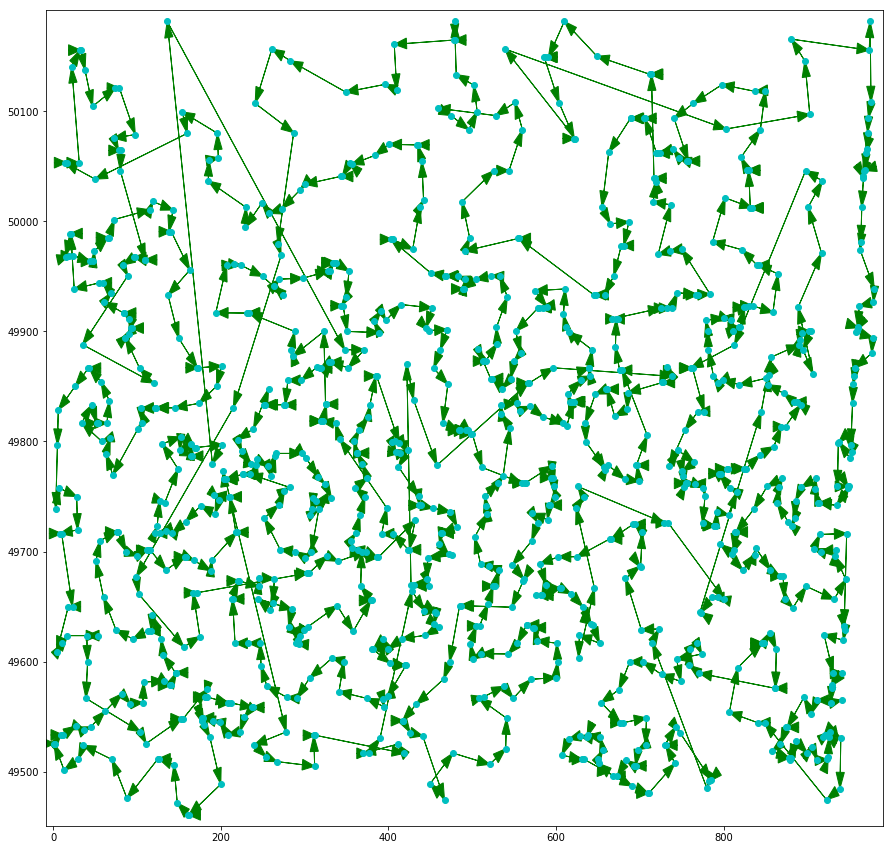

Ruta
 ➞  408 ➞  688 ➞  634 ➞  680 ➞  817 ➞  841 ➞  925 ➞  924 ➞  900 ➞  943 ➞  856 ➞  823 ➞  810 ➞  936 ➞  938 ➞  935 ➞  961 ➞  881 ➞  972 ➞  979 ➞  978 ➞  977 ➞  950 ➞  909 ➞  882 ➞  877 ➞  920 ➞  928 ➞  906 ➞  927 ➞  846 ➞  887 ➞  858 ➞  868 ➞  876 ➞  912 ➞  875 ➞  929 ➞  934 ➞  836 ➞  937 ➞  870 ➞  796 ➞  871 ➞  980 ➞  970 ➞  971 ➞  713 ➞  714 ➞  717 ➞  718 ➞  837 ➞  959 ➞  948 ➞  864 ➞  880 ➞  878 ➞  879 ➞  773 ➞  624 ➞  631 ➞  730 ➞  694 ➞  895 ➞  746 ➞  791 ➞  792 ➞  790 ➞  808 ➞  765 ➞  801 ➞  576 ➞  625 ➞  780 ➞  783 ➞  606 ➞  772 ➞  845 ➞  582 ➞  664 ➞  603 ➞  711 ➞  760 ➞  704 ➞  847 ➞  896 ➞  908 ➞  839 ➞  949 ➞  952 ➞  954 ➞  964 ➞  803 ➞  622 ➞  604 ➞  974 ➞  975 ➞  956 ➞  955 ➞  885 ➞  893 ➞  913 ➞  957 ➞  899 ➞  867 ➞  944 ➞  915 ➞  947 ➞  916 ➞  942 ➞  911 ➞  771 ➞  684 ➞  748 ➞  785 ➞  629 ➞  615 ➞  653 ➞  693 ➞  698 ➞  651 ➞  637 ➞  691 ➞  668 ➞  742 ➞  607 ➞  656 ➞  650 ➞  673 ➞  638 ➞  731 ➞  743 ➞  702 ➞  683 ➞  626 ➞  628 ➞  632 ➞  627 ➞  729 ➞  890 ➞  633 ➞  761 

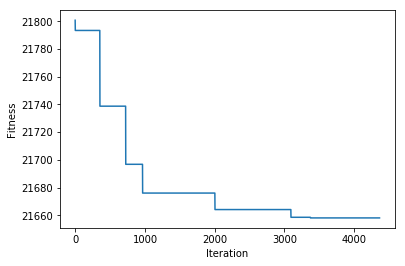

In [3]:
sa = SimAnneal(coords, stopping_iter=5000)
sa.anneal()
sa.visualize_routes()
sa.visualize_routes2()
sa.plot_learning()